In [4]:
import warnings
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.externals import joblib
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

import utils

warnings.filterwarnings('ignore')


In [5]:
data_file = pd.read_excel('data/Sept/IDOLOGY_Qualifiers.xlsx')
data_file.drop('QUALIFIERS_NEW=Empty', axis=1, inplace=True)
print(data_file.shape)
samplings = [5, 6, 7, 8]
img_dir = '/home/cognam/Pictures/Ideology_conf/'

(16458, 20)


In [6]:
def train_model(data_train, data_test, clfr, hyper_param, img_prefix):
    for sampling in samplings:
        x_train, y_train = utils.preprocessunEqualDistribution(data_train, sampling)

        print(f' Classifier = {img_prefix} Sampling = {sampling}')

        clf = GridSearchCV(clfr, hyper_param, cv=5, scoring='recall_macro')
        clf.fit(x_train, y_train)
        print(clf.best_params_)
        
        x_test = data_test.drop('Label', axis=1)
        y_test = data_test['Label']
        
        y_pred = clf.predict(x_test)

        conf = confusion_matrix(y_test, y_pred)
        sns.heatmap(conf, annot=True, cmap="Greens", fmt='g', cbar_kws={'label': f'{img_prefix} sampling = {sampling}'})
        file_name = img_dir + img_prefix + '_' + str(sampling) + '.png'
        plt.savefig(file_name, dpi=600)
        plt.show()


In [7]:
data_train, data_test = train_test_split(data_file, test_size=0.3, random_state=45)


 Classifier = RandomForest Sampling = 5
{'max_depth': 11}


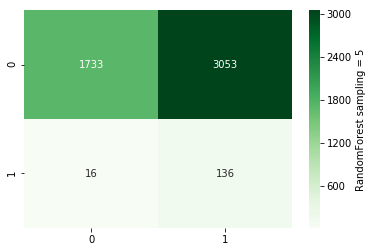

 Classifier = RandomForest Sampling = 6
{'max_depth': 15}


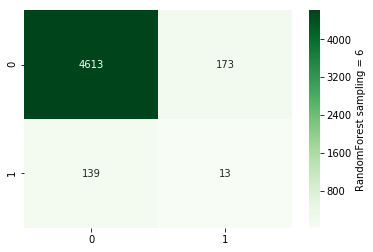

 Classifier = RandomForest Sampling = 7
{'max_depth': 11}


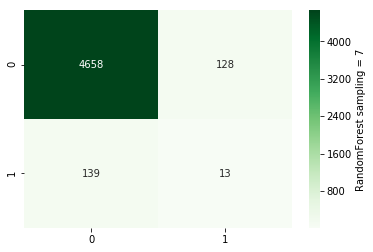

 Classifier = RandomForest Sampling = 8
{'max_depth': 14}


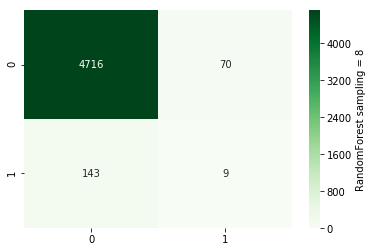

In [5]:
# Random Forest

rf_param = [{'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]}]
train_model(data_train, data_test, RandomForestClassifier(), rf_param, 'RandomForest')

 Classifier = LogisticRegression Sampling = 5
{'C': 1.0, 'penalty': 'l2'}


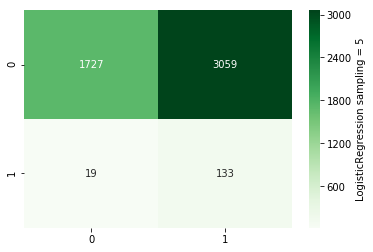

 Classifier = LogisticRegression Sampling = 6
{'C': 1.0, 'penalty': 'l2'}


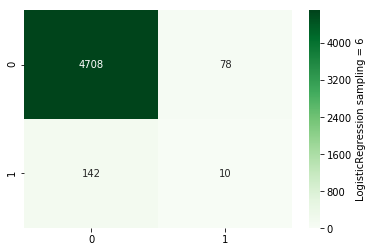

 Classifier = LogisticRegression Sampling = 7
{'C': 2.7825594022071245, 'penalty': 'l1'}


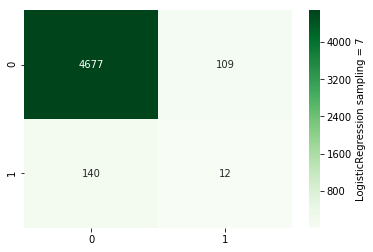

 Classifier = LogisticRegression Sampling = 8
{'C': 2.7825594022071245, 'penalty': 'l1'}


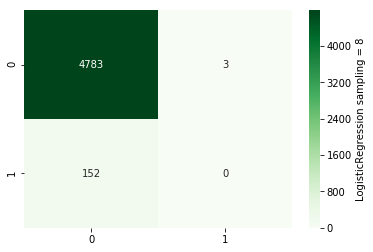

In [6]:
from sklearn.linear_model import LogisticRegression
import numpy as np

lr_param = {'penalty' : ['l1', 'l2'], 'C' : np.logspace(0,4,10)}

train_model(data_train, data_test, LogisticRegression(), lr_param, 'LogisticRegression')

 Classifier = SVM Sampling = 5
{'C': 1, 'gamma': 1, 'kernel': 'rbf'}


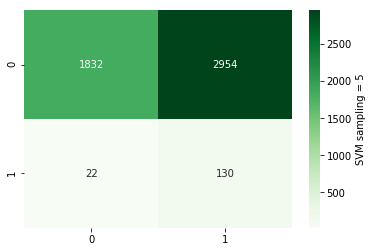

 Classifier = SVM Sampling = 6
{'C': 10, 'gamma': 1, 'kernel': 'rbf'}


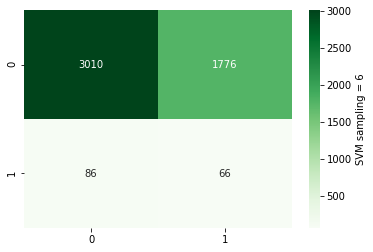

 Classifier = SVM Sampling = 7
{'C': 1, 'gamma': 1, 'kernel': 'linear'}


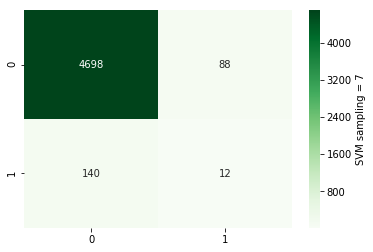

 Classifier = SVM Sampling = 8
{'C': 10, 'gamma': 1, 'kernel': 'rbf'}


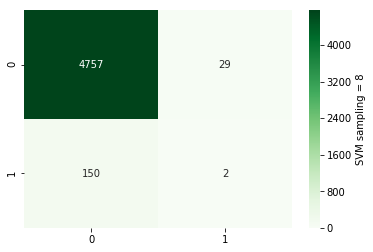

In [7]:
from sklearn.svm import SVC

svc_param = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}

train_model(data_train, data_test, SVC(), svc_param, 'SVM')

 Classifier = DecisionTree Sampling = 5
{'max_depth': 7}


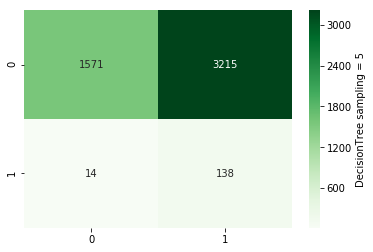

 Classifier = DecisionTree Sampling = 6
{'max_depth': 11}


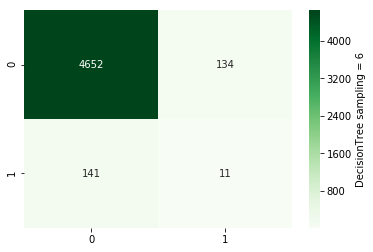

 Classifier = DecisionTree Sampling = 7
{'max_depth': 10}


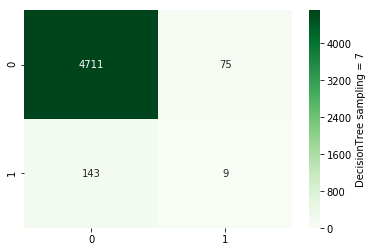

 Classifier = DecisionTree Sampling = 8
{'max_depth': 5}


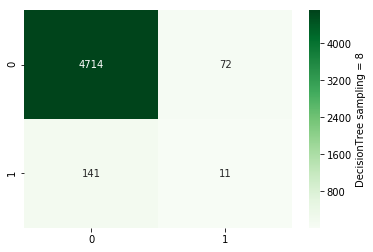

In [8]:
from sklearn.tree import DecisionTreeClassifier as DTC

dtc_param = {'max_depth' : [4,5,6,7,8,9,10,11,12,13,14,15]}
train_model(data_train, data_test, DTC(), dtc_param, 'DecisionTree')

In [9]:
new_feat =['QUALIFIERS_NEW=Address Does Not Match', 'QUALIFIERS_NEW=Address Longevity Alert', 
           'QUALIFIERS_NEW=Address Velocity Alert', 'QUALIFIERS_NEW=Age Above Maximum',
           'QUALIFIERS_NEW=Data Strength Alert', 'QUALIFIERS_NEW=Low Risk Score', 
           'QUALIFIERS_NEW=Single Address in File', 'QUALIFIERS_NEW=Street Name Does Not Match',
           'QUALIFIERS_NEW=Street Number Does Not Match', 'Label']
df = data_file[new_feat]

In [10]:
data_train_, data_test_ = train_test_split(df, test_size=0.3, random_state=45)


 Classifier = RandomForest_NewFeat Sampling = 5
{'max_depth': 8}


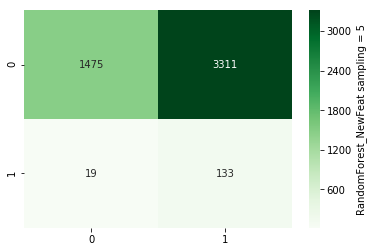

 Classifier = RandomForest_NewFeat Sampling = 6
{'max_depth': 13}


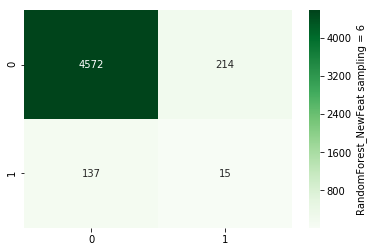

 Classifier = RandomForest_NewFeat Sampling = 7
{'max_depth': 12}


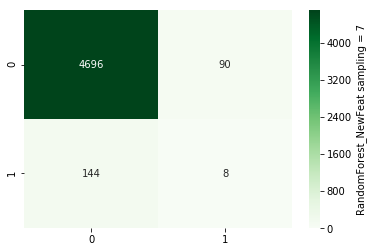

 Classifier = RandomForest_NewFeat Sampling = 8
{'max_depth': 12}


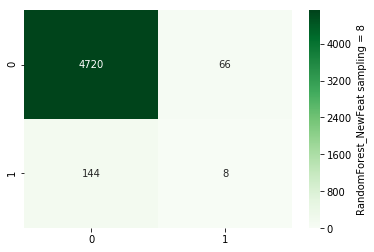

In [11]:
rf_param = [{'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]}]
train_model(data_train_, data_test_, RandomForestClassifier(), rf_param, 'RandomForest_NewFeat')

 Classifier = LogisticRegression_NewFeat Sampling = 5
{'C': 1.0, 'penalty': 'l1'}


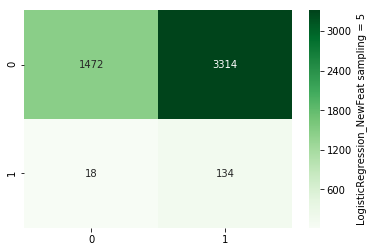

 Classifier = LogisticRegression_NewFeat Sampling = 6
{'C': 2.7825594022071245, 'penalty': 'l2'}


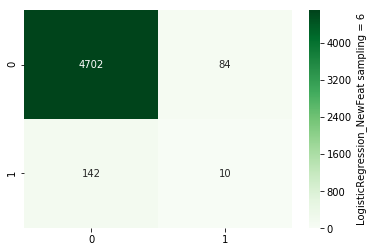

 Classifier = LogisticRegression_NewFeat Sampling = 7
{'C': 1.0, 'penalty': 'l2'}


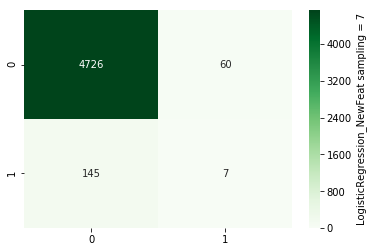

 Classifier = LogisticRegression_NewFeat Sampling = 8
{'C': 7.742636826811269, 'penalty': 'l2'}


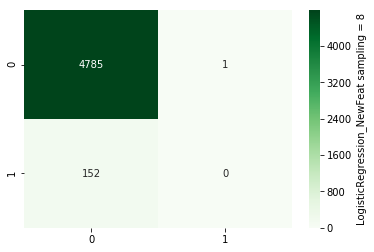

In [12]:
lr_param = {'penalty' : ['l1', 'l2'], 'C' : np.logspace(0,4,10)}
train_model(data_train_, data_test_, LogisticRegression(), lr_param, 'LogisticRegression_NewFeat')

 Classifier = DecisionTree_NewFeat Sampling = 5
{'max_depth': 4}


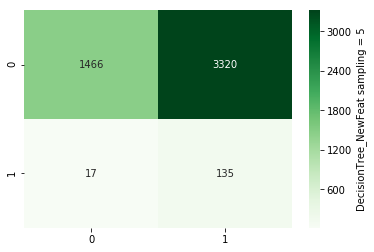

 Classifier = DecisionTree_NewFeat Sampling = 6
{'max_depth': 5}


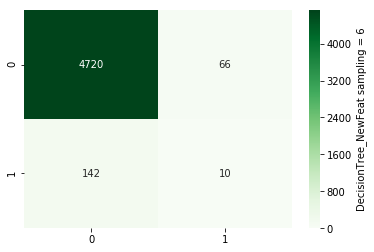

 Classifier = DecisionTree_NewFeat Sampling = 7
{'max_depth': 4}


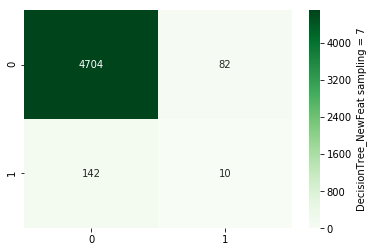

 Classifier = DecisionTree_NewFeat Sampling = 8
{'max_depth': 5}


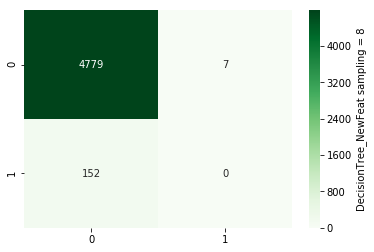

In [13]:
train_model(data_train_, data_test_, DTC(), dtc_param, 'DecisionTree_NewFeat')

In [8]:
temp_file = pd.read_excel('data/Sept/IdologyFeat/Transformed-ACH-1-2017_6-2019.xlsx')
temp_file.columns

Index(['Label', 'Amount', 'Payer Specific Code', 'Origin State ISO Code',
       'Beneficiary State ISO Code', 'Sending Method Type', 'DOMAIN_NAME',
       'IP_USER_TYPE', 'Tx date and time', 'Tx count for remitter',
       ...
       'Days count from the last tx_transformed', 'Age_transformed',
       'Joining Time_transformed', 'Origin State_IV', 'Beneficiary State_IV',
       'Payer_IV', 'Sending Method Type_IV', 'DOMAIN_NAME_IV',
       'IP_USER_TYPE_IV', 'User Level_IV'],
      dtype='object', length=108)

In [23]:
cols = []

for cl in temp_file.columns:
    if cl.startswith('QUALIFIERS'):
        cols.append(cl)
        
print(len(cols))

cols = list(filter(lambda a: a != 'Label', cols))

for cl in cols:
    print(cl)

70
QUALIFIERS_NEW=Activation Date Alert
QUALIFIERS_NEW=Address Does Not Match
QUALIFIERS_NEW=Address Location Alert
QUALIFIERS_NEW=Address Longevity Alert
QUALIFIERS_NEW=Address Stability Alert
QUALIFIERS_NEW=Address Velocity Alert
QUALIFIERS_NEW=Age Above Maximum
QUALIFIERS_NEW=Age Below Minimum
QUALIFIERS_NEW=Alternate Address Alert
QUALIFIERS_NEW=Bankruptcy Found
QUALIFIERS_NEW=DOB/YOB Not Available
QUALIFIERS_NEW=Data Strength Alert
QUALIFIERS_NEW=Email Recently Verified
QUALIFIERS_NEW=Email or Domain Does Not Exist
QUALIFIERS_NEW=Empty
QUALIFIERS_NEW=High Risk Address
QUALIFIERS_NEW=High Risk Email - Country
QUALIFIERS_NEW=High Risk Email - Domain
QUALIFIERS_NEW=High Risk Email - Fraud
QUALIFIERS_NEW=High Risk IP - Bot
QUALIFIERS_NEW=High Risk IP - Spam
QUALIFIERS_NEW=High Risk IP - Tor
QUALIFIERS_NEW=High Risk Score
QUALIFIERS_NEW=IP Location Alert
QUALIFIERS_NEW=IP Location Not Available
QUALIFIERS_NEW=IP Not Located
QUALIFIERS_NEW=IP State Does Not Match
QUALIFIERS_NEW=ITIN Loc

In [24]:
test_file = pd.read_excel('data/Sept/IdologyFeat/Transformed-Aug19ACH.xlsx')

cols.append('Label')
data_train = temp_file[cols]
data_test = test_file[cols]
data_train.shape, data_test.shape

((2329, 71), (156, 71))

In [25]:
for cl in data_train.columns:
    print(cl)

QUALIFIERS_NEW=Activation Date Alert
QUALIFIERS_NEW=Address Does Not Match
QUALIFIERS_NEW=Address Location Alert
QUALIFIERS_NEW=Address Longevity Alert
QUALIFIERS_NEW=Address Stability Alert
QUALIFIERS_NEW=Address Velocity Alert
QUALIFIERS_NEW=Age Above Maximum
QUALIFIERS_NEW=Age Below Minimum
QUALIFIERS_NEW=Alternate Address Alert
QUALIFIERS_NEW=Bankruptcy Found
QUALIFIERS_NEW=DOB/YOB Not Available
QUALIFIERS_NEW=Data Strength Alert
QUALIFIERS_NEW=Email Recently Verified
QUALIFIERS_NEW=Email or Domain Does Not Exist
QUALIFIERS_NEW=Empty
QUALIFIERS_NEW=High Risk Address
QUALIFIERS_NEW=High Risk Email - Country
QUALIFIERS_NEW=High Risk Email - Domain
QUALIFIERS_NEW=High Risk Email - Fraud
QUALIFIERS_NEW=High Risk IP - Bot
QUALIFIERS_NEW=High Risk IP - Spam
QUALIFIERS_NEW=High Risk IP - Tor
QUALIFIERS_NEW=High Risk Score
QUALIFIERS_NEW=IP Location Alert
QUALIFIERS_NEW=IP Location Not Available
QUALIFIERS_NEW=IP Not Located
QUALIFIERS_NEW=IP State Does Not Match
QUALIFIERS_NEW=ITIN Locate

 Classifier = RandomForestPCA Sampling = 5
{'pca__n_components': 16, 'tree__max_depth': 6}


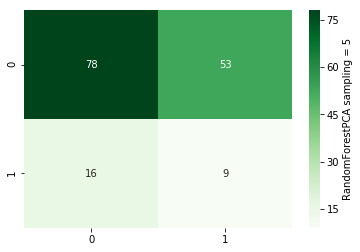

 Classifier = RandomForestPCA Sampling = 6
{'pca__n_components': 26, 'tree__max_depth': 13}


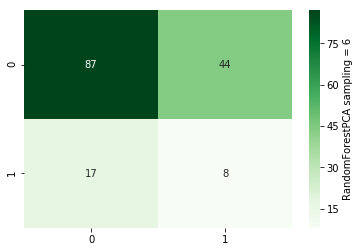

 Classifier = RandomForestPCA Sampling = 7
{'pca__n_components': 24, 'tree__max_depth': 6}


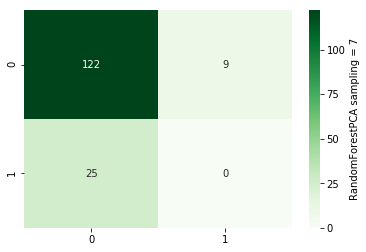

 Classifier = RandomForestPCA Sampling = 8
{'pca__n_components': 16, 'tree__max_depth': 5}


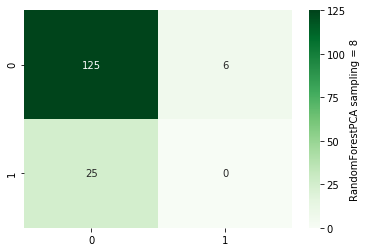

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, SparsePCA

pipe = Pipeline(steps=[('pca', PCA()),
                 ('tree', RandomForestClassifier())])


rf_param = [{'tree__max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 
             'pca__n_components': [10, 12, 14, 16, 18, 20, 22, 24, 26]}]
train_model(data_train, data_test, pipe, rf_param, 'RandomForestPCA')